## Set up

Import the [pymp2rage](https://github.com/Gilles86/pymp2rage) package

In [1]:
import pymp2rage

Set up a MP2RAGE object with all the necessary images

In [2]:
fitter = pymp2rage.MP2RAGE(inv1='/data/sourcedata/sub-012/anat/sub-012_acq-highres0p64ME_INV1.nii',
                           inv1ph='/data/sourcedata/sub-012/anat/sub-012_acq-highres0p64ME_INV1ph.nii',
                           inv2='/data/sourcedata/sub-012/anat/sub-012_acq-highres0p64ME_INV2.nii',                       
                           inv2ph='/data/sourcedata/sub-012/anat/sub-012_acq-highres0p64ME_INV2ph.nii')



## Fit MP2RAGE (UNI)

The function fit_mp2rage() creates a unified T1-weighted image (aka "UNI" or "MP2RAGE")

In [3]:
fitter.fit_mp2rage()

/home/neuro/git/pymp2rage/pymp2rage/mp2ragefitter.py:69: RuntimeWarning: invalid value encountered in true_divide
  self._mp2rage = (np.real(compINV1*compINV2/(compINV1**2 + compINV2**2)))*4095+2048


The resulting image is stored in the ``mp2rage``-attribute.
We can use the plotting library of nilearn to visualize the result

In [4]:
from nilearn import plotting

# Use matplotlib for tweaking and inline-plotting
import matplotlib.pyplot as plt
%matplotlib inline

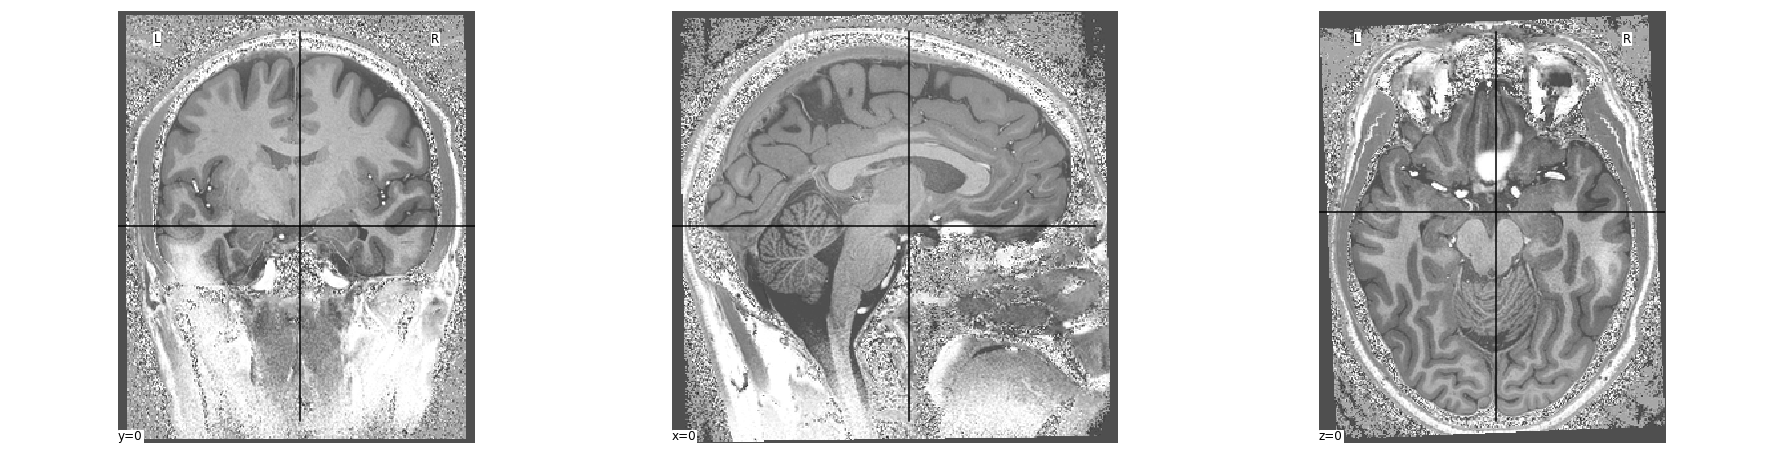

In [5]:
fig = plt.figure(figsize=(24, 6))
plotting.plot_anat(fitter.mp2rage, figure=fig, cut_coords=(0, 0, 0))

## Fit T1-map

If we know the acqusition parameters of our MP2RAGE-sequence, we can also fit a T1-map

In [6]:
fitter.fit_t1(nimages=2, 
              MPRAGE_tr=6.723, 
              invtimesAB=[0.67, 3.855], 
              flipangleABdegree=[7,6], 
              nZslices=150, 
              FLASH_tr=0.0062)

... and plot it

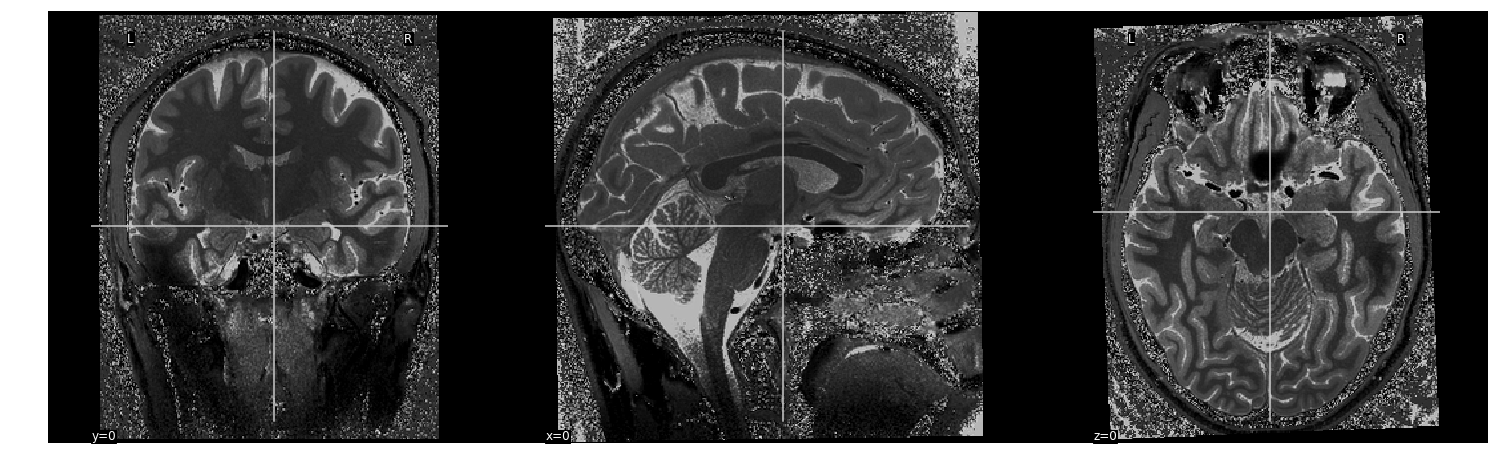

In [7]:
fig = plt.figure(figsize=(20, 6))
plotting.plot_anat(fitter.t1, figure=fig, cut_coords=(0, 0, 0))

Since the scale of T1 values is meaningful (T1 is measured in ms), we can also use a more quantitative plot

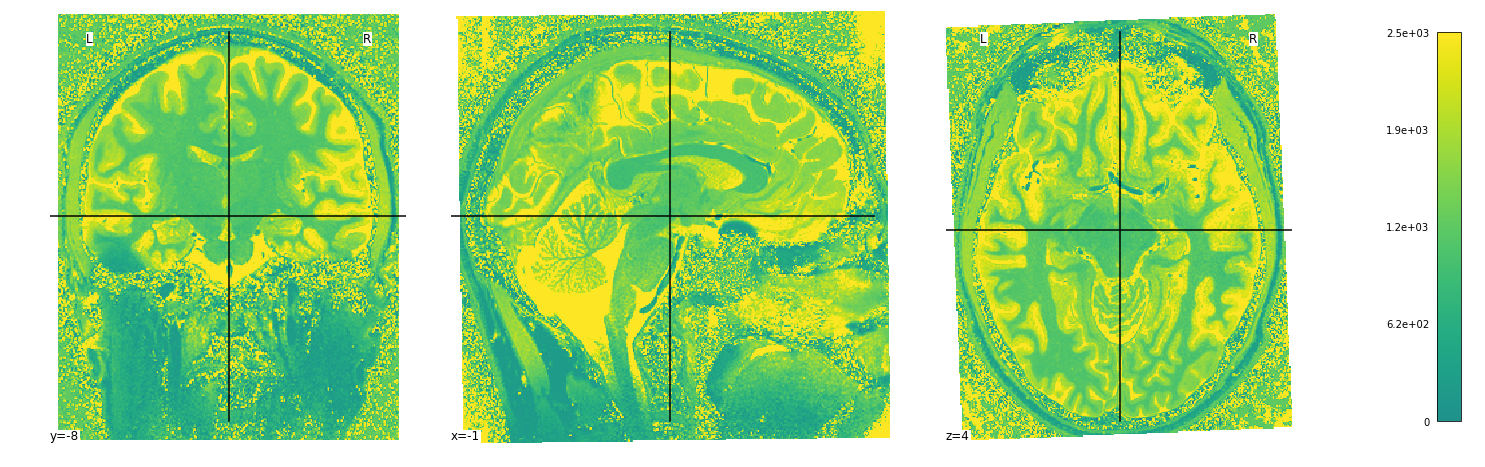

In [8]:
fig = plt.figure(figsize=(20, 6))
plotting.plot_stat_map(fitter.t1, cmap=plt.cm.viridis, figure=fig, symmetric_cbar=False, vmax=2500)

## Masking

We can use the masking possibilities of nilearn to mask out the regions with little signal. The second inversion image (INV2) is  well-equiped for this

The simplest option is to use the [``compute_mask``](http://nilearn.github.io/modules/generated/nilearn.masking.compute_epi_mask.html)-functionality of the [nilearn](http://nilearn.github.io/)-package. It is integrated into pymp2rage and the default option of ``fit_mask()``

### Automatic masking

In [9]:
fitter.fit_mask()

/usr/local/miniconda/lib/python3.6/site-packages/nilearn/image/resampling.py:481: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


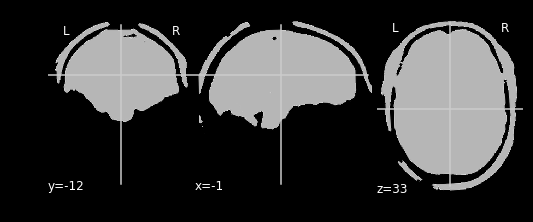

In [10]:
plotting.plot_anat(fitter.mask)

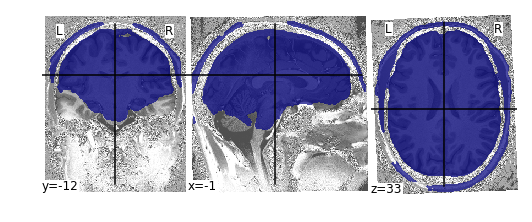

In [11]:
plotting.plot_roi(fitter.mask, fitter.mp2rage)

### Manual masking

We can also use a specific value to threshold the image at a more conservative value.

Let's plot a histogram to see what would be a good value

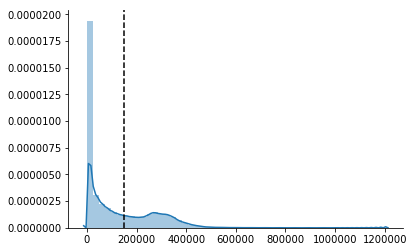

In [12]:
import seaborn as sns
threshold = 150000
sns.distplot(fitter.inv2.get_data().ravel())
sns.despine()
plt.axvline(threshold, c='k', ls='--')

In [13]:
fitter.fit_mask(threshold=threshold)

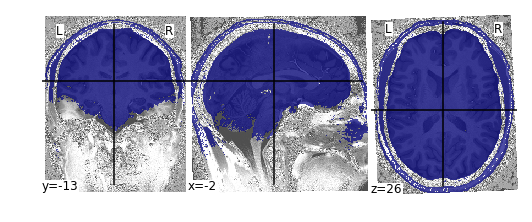

In [14]:
plotting.plot_roi(fitter.mask, fitter.mp2rage)

There are also 'convenience'-attributes that automatically mask images

#### Masked T1

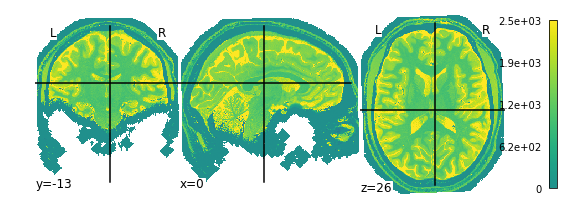

In [20]:
plotting.plot_stat_map(fitter.t1_masked, None, cmap=plt.cm.viridis, symmetric_cbar=False, vmax=2500)

#### Masked MP2RAGE

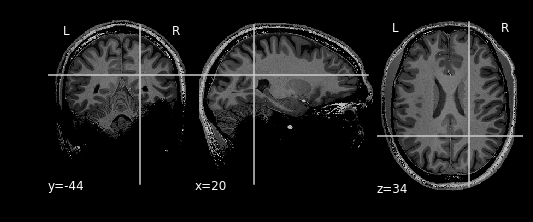

In [16]:
plotting.plot_anat(fitter.mp2rage_masked)

#### Masked INV1

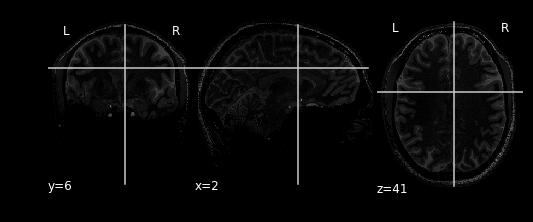

In [17]:
plotting.plot_anat(fitter.inv1_masked)

#### Masked INV2

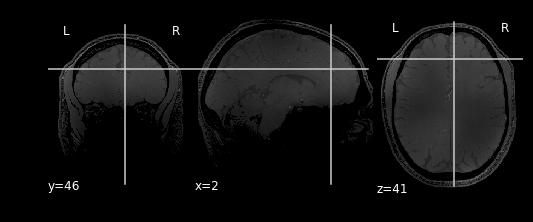

In [18]:
plotting.plot_anat(fitter.inv2_masked)

## Saving the data

Since the underlying images are [``Nifti1Image``s](http://nipy.org/nibabel/reference/nibabel.nifti1.html) as implemented in [``nibabel``](http://nipy.org/nibabel/), they can easily be saved using `to_filename()`:

In [19]:
fitter.t1.to_filename('/data/derivatives/sub-012/anat/sub-012_acq-highres0p64ME_T1.nii')
fitter.mp2rage.to_filename('/data/derivatives/sub-012/anat/sub-012_acq-highres0p64ME_T1w.nii')
